In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('data/weight-height.csv')

In [6]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


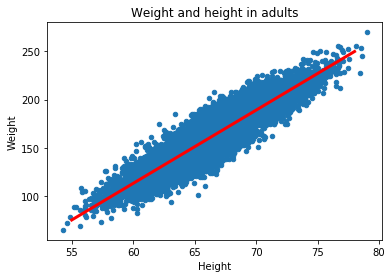

In [9]:
df.plot(kind='scatter',x='Height',y='Weight',title='Weight and height in adults')
plt.plot([55,78],[75,250],color='red',linewidth=3)

In [11]:
def line(x,w=0,b=0):
    return x*w+b
x=np.linspace(55,80,100)
yhat=line(x,w=0,b=0)

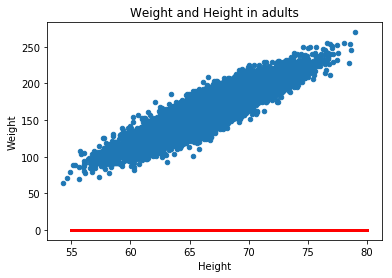

In [12]:
df.plot(kind='scatter',x='Height',y='Weight',title='Weight and Height in adults')
plt.plot(x,yhat,color='red',linewidth=3)

In [13]:
def mean_squared_error(y_true,y_pred):
    s=(y_true-y_pred)**2
    return s.mean()

In [14]:
X=df[['Height']].values
y_true =df['Weight'].values


In [15]:
y_true

array([ 241.89356318,  162.31047252,  212.74085556, ...,  128.47531878,
        163.85246135,  113.64910268])

In [16]:
y_pred = line(X)

In [17]:
y_pred

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])

In [19]:
mean_squared_error(y_true,y_pred.ravel())

27093.83757456157

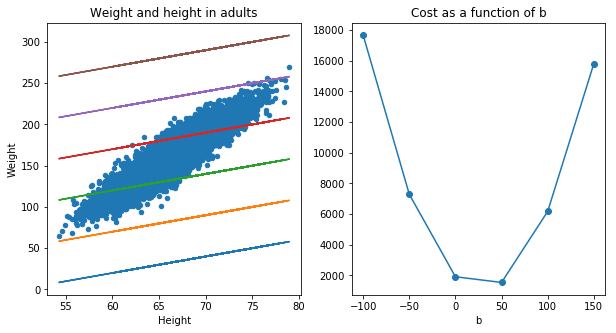

In [22]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(121)
df.plot(kind='scatter',x='Height',y='Weight',title='Weight and height in adults',ax=ax1)
bbs = np.array([-100,-50,0,50,100,150])
mses=[]
for b in bbs:
    y_pred = line(X,w=2, b=b)
    mse = mean_squared_error(y_true,y_pred)
    mses.append(mse)
    plt.plot(X,y_pred)
ax2 = plt.subplot(122)
plt.plot(bbs,mses,'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

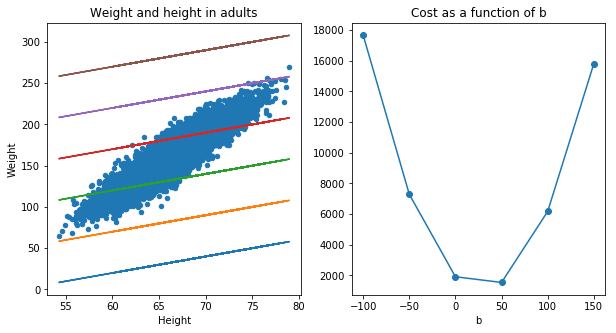

In [27]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(121)
df.plot(kind='scatter',x='Height',y='Weight',title='Weight and height in adults',ax=ax1)
bbs = np.array([-100,-50,0,50,100,150])
mses=[]
for b in bbs:
    y_pred = line(X,w=2, b=b)
    mse = mean_squared_error(y_true,y_pred)
    mses.append(mse)
    plt.plot(X,y_pred)
ax2 = plt.subplot(122)
plt.plot(bbs,mses,'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD

Using TensorFlow backend.


In [29]:
model = Sequential()

In [30]:
model.add(Dense(1,input_shape=(1,)))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(Adam(lr=0.8),'mean_squared_error')
X

array([[ 73.84701702],
       [ 68.78190405],
       [ 74.11010539],
       ..., 
       [ 63.86799221],
       [ 69.03424313],
       [ 61.94424588]])

In [33]:
model.fit(X,y_true,epochs=40)

Epoch 1/40
10000/10000 [==============================] - 0s - loss: 1312.8912     
Epoch 2/40
10000/10000 [==============================] - 0s - loss: 555.3762     
Epoch 3/40
10000/10000 [==============================] - 0s - loss: 538.2946     - ETA: 0s - loss: 53
Epoch 4/40
10000/10000 [==============================] - 0s - loss: 500.0967     
Epoch 5/40
10000/10000 [==============================] - 0s - loss: 472.7374     
Epoch 6/40
10000/10000 [==============================] - 0s - loss: 425.9066     
Epoch 7/40
10000/10000 [==============================] - 0s - loss: 388.1775     
Epoch 8/40
10000/10000 [==============================] - 0s - loss: 344.8196     - ETA: 0s - loss: 350
Epoch 9/40
10000/10000 [==============================] - 0s - loss: 314.9785     
Epoch 10/40
10000/10000 [==============================] - 0s - loss: 295.1062     
Epoch 11/40
10000/10000 [==============================] - 0s - loss: 263.6075     
Epoch 12/40
10000/10000 [==================

In [34]:
y_pred=model.predict(X)

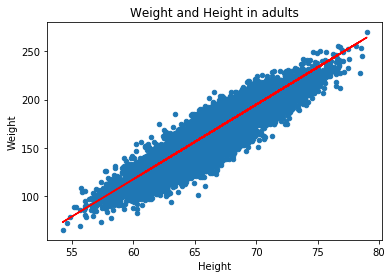

In [35]:
df.plot(kind='scatter',x='Height',y='Weight',title='Weight and Height in adults')
plt.plot(X,y_pred,color='red')

In [36]:
W,B = model.get_weights()

In [37]:
W

array([[ 7.75680685]], dtype=float32)

In [38]:
B

array([-348.17324829], dtype=float32)

In [44]:
#Evaluating Model Performance

In [45]:
from sklearn.metrics import r2_score
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))


The R2 score is 0.829


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [47]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))


In [49]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [50]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [51]:
from sklearn.metrics import mean_squared_error as mse
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	222.5
The Mean Squared Error on the Test set is:	221.9


In [52]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.786
The R2 score on the Test set is:	0.778
